In [1]:
import numpy as np
import matplotlib.pyplot as plt

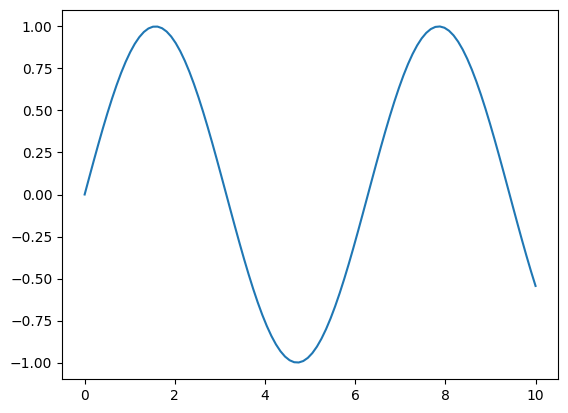

In [53]:
t = np.linspace(0,10,100)
x = np.sin(t)
plt.plot(t,x)

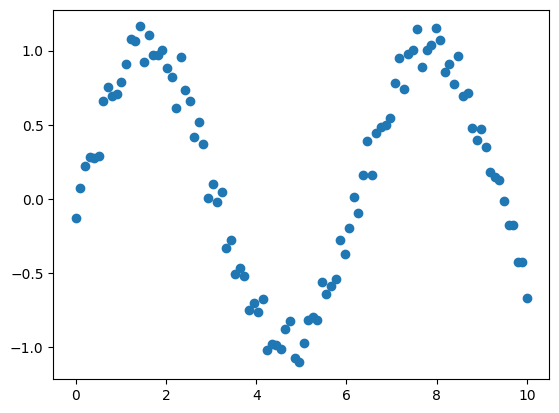

In [54]:
rng = np.random.default_rng()
s = 0.1
noise = rng.normal(x, s)
plt.plot(t,noise, 'o')

In [55]:
def gauss(x, m, s):
    return np.exp(-(x-m)**2/2/s**2)/np.sqrt(2*np.pi)/np.sqrt(s)

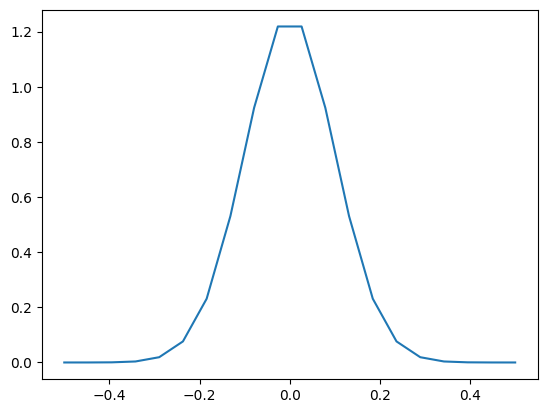

In [56]:
t_plantilla = np.linspace(-0.5,0.5, 20)
plantilla = gauss(t_plantilla, 0,0.1)
plt.plot(t_plantilla, plantilla)

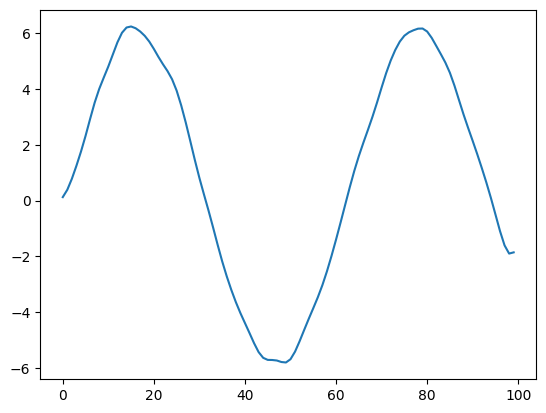

In [57]:
plt.plot(np.convolve(noise, plantilla, mode='same'))

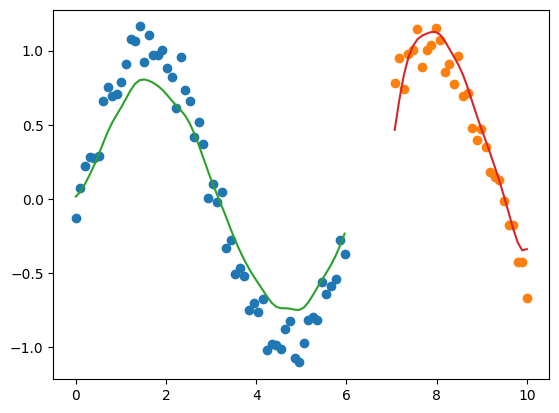

In [61]:
izq = noise[:60]
der = noise[70:]
trend_izq = np.convolve(izq, plantilla, mode='same')/np.sqrt(len(izq))
trend_der = np.convolve(der, plantilla, mode='same')/np.sqrt(len(der))
plt.plot(t[:60], izq,'o')
plt.plot(t[70:], der,'o')
plt.plot(t[:60], trend_izq)
plt.plot(t[70:], trend_der)

STD IZQ: 0.19874983130993024 - STD DER: 0.12919497947339917


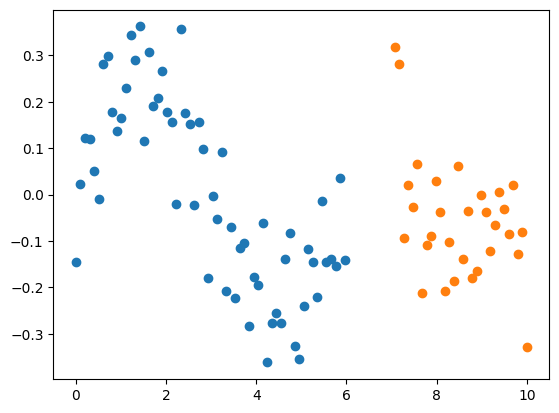

In [64]:
# analizando el ruido
plt.plot(t[:60], izq-trend_izq,'o')
plt.plot(t[70:], der-trend_der,'o')
print(f'STD IZQ: {(izq-trend_izq).std()} - STD DER: {(der-trend_der).std()}')
std = ((izq-trend_izq).std()+(der-trend_der).std())/2

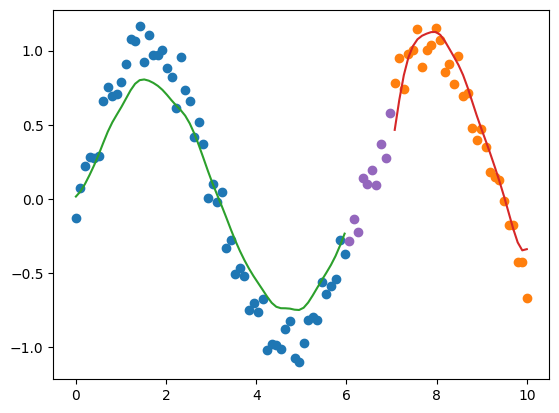

In [65]:
left = trend_izq[-1]
right = trend_der[0]
t_izq = t[59]
t_der = t[70]
# interpolacion lineal

a = (right-left)/(t_der-t_izq)
t_int = t[60:70]
lin = left + a*(t_int-t_izq)   # FIX IT!!!
plt.plot(t[:60], izq,'o')
plt.plot(t[70:], der,'o')
plt.plot(t[:60], trend_izq)
plt.plot(t[70:], trend_der)
plt.plot(t_int, rng.normal(lin, std), 'o')